## waste classification management

In [3]:
import numpy as np
import pandas as pd

In [4]:
!pip install tensorflow
!pip install tensorflow-cpu

  Using cached tensorflow-2.18.0-cp310-cp310-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp310-cp310-win_amd64.whl.metadata (4.9 kB)
Using cached tensorflow-2.18.0-cp310-cp310-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp310-cp310-win_amd64.whl (390.0 MB)


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\0304h\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



  Using cached tensorflow_cpu-2.18.0-cp310-cp310-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp310-cp310-win_amd64.whl.metadata (4.9 kB)
Using cached tensorflow_cpu-2.18.0-cp310-cp310-win_amd64.whl (7.6 kB)
Using cached tensorflow_intel-2.18.0-cp310-cp310-win_amd64.whl (390.0 MB)


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\0304h\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



In [5]:
pip install nbformat


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [7]:
train_path = "Dataset\TRAIN"
test_path = "Dataset\TEST"

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [9]:
# Visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])
data = pd.DataFrame({'image': x_data, 'label': y_data})

100%|██████████| 9999/9999 [01:11<00:00, 140.02it/s]


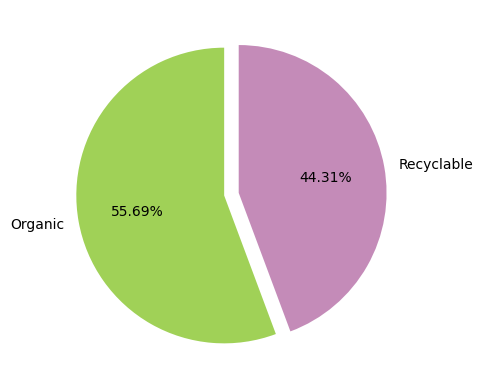

In [10]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%',
        colors=colors, startangle=90, explode=[0.05, 0.05])
plt.show()

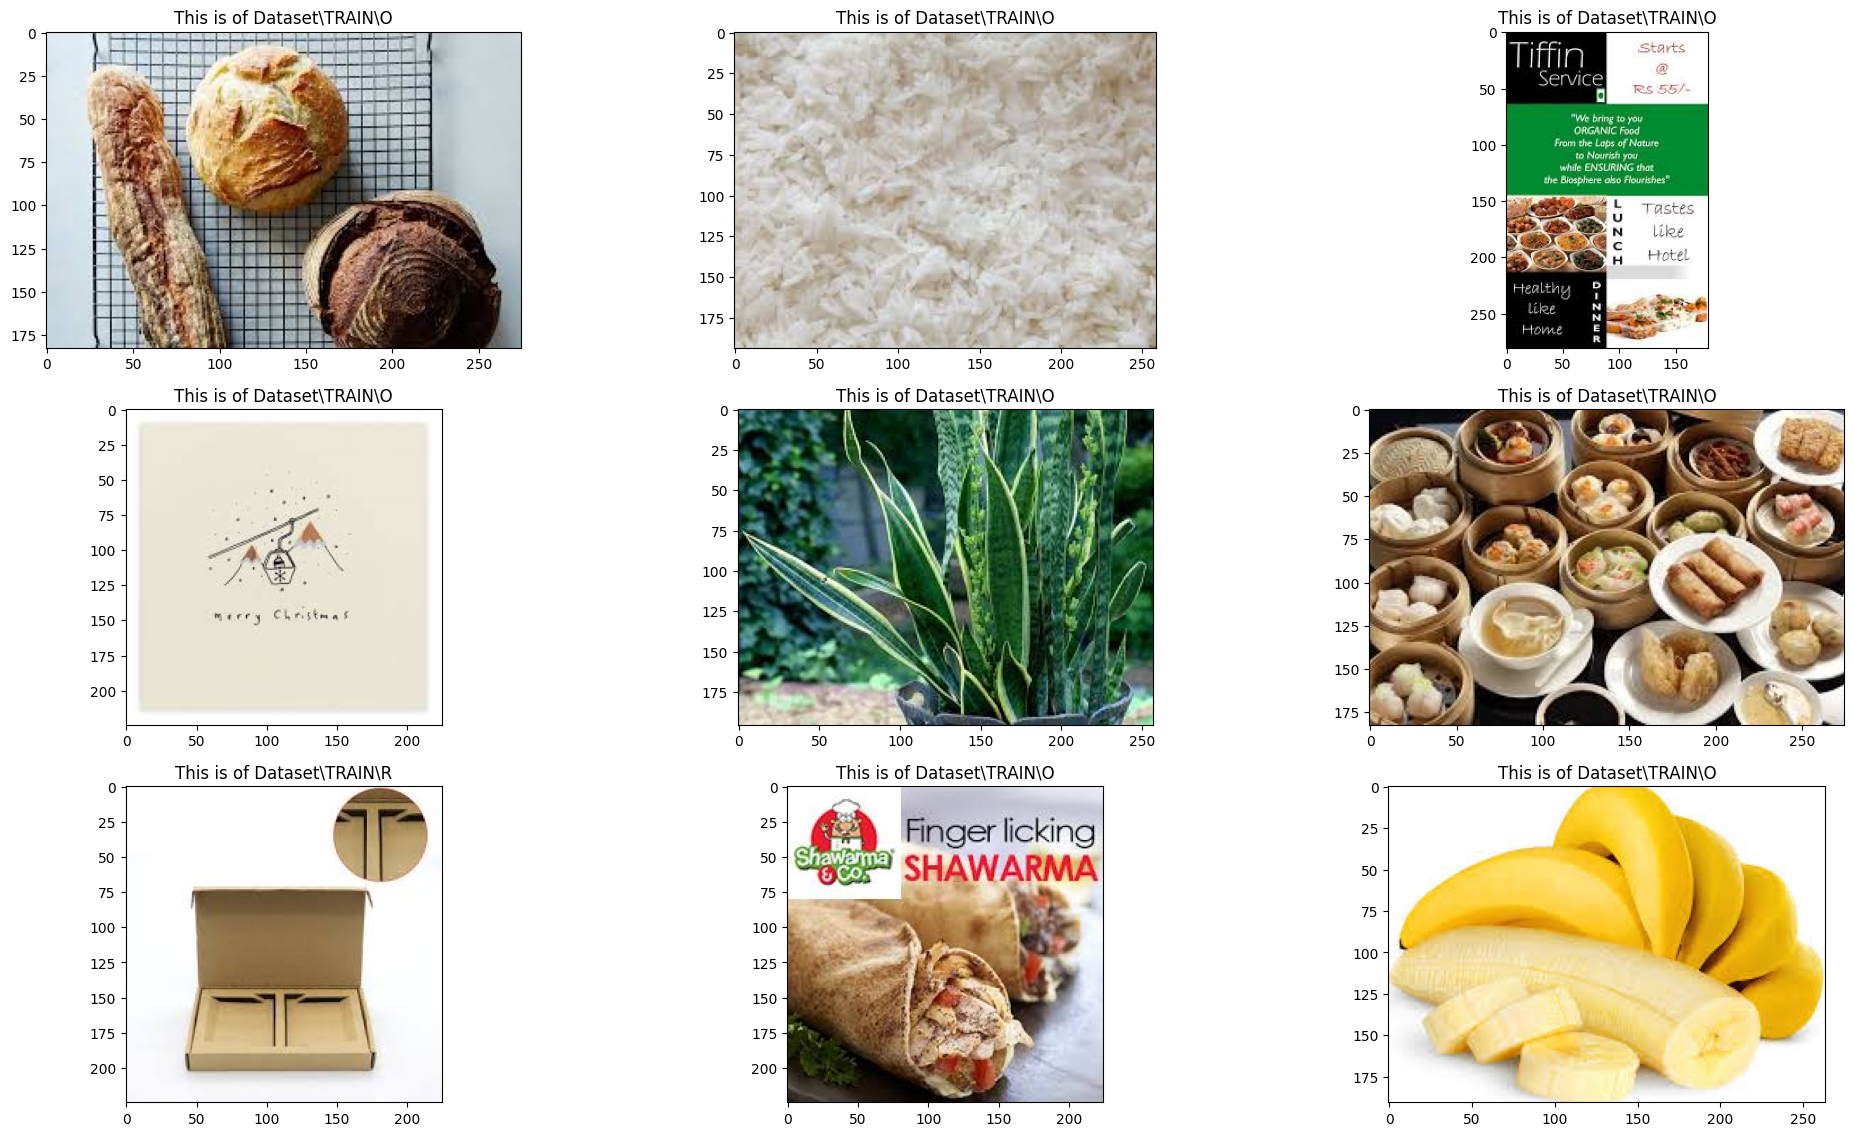

In [11]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()
   

## CNN-Convolutional Neural Network

In [20]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256


In [21]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:

train_datagen = ImageDataGenerator(rescale = 1./255)

In [24]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size = (224, 224),
    batch_size = batch_size, 
    color_mode = "rgb", 
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [26]:
hist = model.fit(
    train_generator, 
    epochs=10, 
    validation_data=test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 481s 5s/step - accuracy: 0.6930 - loss: 0.7229 - val_accuracy: 0.8448 - val_loss: 0.3673
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 616s 7s/step - accuracy: 0.8239 - loss: 0.4254 - val_accuracy: 0.8858 - val_loss: 0.3246
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 488s 5s/step - accuracy: 0.8476 - loss: 0.3784 - val_accuracy: 0.8428 - val_loss: 0.3594
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 398s 4s/step - accuracy: 0.8634 - loss: 0.3461 - val_accuracy: 0.8890 - val_loss: 0.2949
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 451s 5s/step - accuracy: 0.8710 - loss: 0.3229 - val_accuracy: 0.8806 - val_loss: 0.3069
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 12401s 141s/step - accuracy: 0.8845 - loss: 0.2976 - val_accuracy: 0.8902 - val_loss: 0.3097
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1604s 18s/step - accuracy: 0.8915 - loss: 0.2731 - val_accuracy: 0.8997 - val_loss: 0.2884
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 703s 8s/step - accuracy: 0.9123 - loss: 0.2270 - val_accuracy: 0.89